# Bonus Points - If you deploy the app with Authentication. 

**Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.**

**Suggested questions:   
1.Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
cd ..

D:\


In [28]:
cd Test answers

D:\Test answers


In [29]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 06DA-8863

 Directory of D:\Test answers

05/02/2022  06:47 PM    <DIR>          .
05/02/2022  06:47 PM    <DIR>          ..
05/02/2022  06:43 PM    <DIR>          .ipynb_checkpoints
05/02/2022  12:09 PM           161,740 browser_rankings_data.xlsx
04/30/2022  06:22 PM         1,984,182 chrome_reviews (1).csv
05/02/2022  06:43 PM             1,936 Part 1 Question 1.ipynb
05/02/2022  06:47 PM           116,984 Part 1 Question 2.ipynb
05/02/2022  03:12 PM         1,406,493 review_data.xlsx
05/02/2022  06:47 PM            43,254 Untitled.ipynb
               6 File(s)      3,714,589 bytes
               3 Dir(s)  240,189,751,296 bytes free


In [30]:
df=pd.read_excel('browser_rankings_data.xlsx')

In [31]:
df.head(10)

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
5,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-06,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
6,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-01-21,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
7,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2020-12-18,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
8,5,android browser,11.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
9,6,android browser,8.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."


In [32]:
df['short_len']=df['Short Description'].apply(len)

In [33]:
df['long_len']=df['Long Description'].apply(len)

In [52]:
df1=df.head(10)
df1

,ID,Keyword,Rank,Country,Language,Date,App_ID,Date of Last Description Change,Short Description,Long Description,short_len,long_len
0,1,browser,2.0,in,en,2020-12-16,8,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1451
1,2,browser,3.0,in,en,2020-12-16,1,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2895
2,3,browser,4.0,in,en,2020-12-16,5,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3289
3,3,browser,4.0,in,en,2020-12-16,5,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,4336
4,4,browser,1.0,in,en,2020-12-16,3,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1569
5,4,browser,1.0,in,en,2020-12-16,3,2021-02-06,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1831
6,4,browser,1.0,in,en,2020-12-16,3,2021-01-21,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,59,1752
7,4,browser,1.0,in,en,2020-12-16,3,2020-12-18,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,59,1572
8,5,android browser,11.0,in,en,2020-12-16,8,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1451
9,6,android browser,8.0,in,en,2020-12-16,1,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2895


**Created the dataframe df1 of 10 records, for checking the correlation of short description, long description and ranking with respect to first 10 records.**

In [35]:
req_df = df1[['short_len','long_len','Rank']]

In [36]:
corr_df=req_df.corr()

In [54]:
corr_df

,short_len,long_len,Rank
short_len,1.000000,0.613831,0.618792
long_len,0.613831,1.000000,0.163911
Rank,0.618792,0.163911,1.000000


**For first 10 records**
1) There is strong positive correlation between Short Description and long description.

2) There is strong positive correlation between Short Description and Ranking.

3) There is weak positive correlation between long Description and Ranking.

**Conclusion:-
If the length of the description is short the ranking will be good as per first 10 records.**

In [38]:
req_df1 = df[['short_len','long_len','Rank']]

In [39]:
corr_df1=req_df1.corr()

In [55]:
corr_df1

,short_len,long_len,Rank
short_len,1.000000,0.721093,0.208939
long_len,0.721093,1.000000,0.392403
Rank,0.208939,0.392403,1.000000


**For first whole DataFrame (df) records**
1) There is strong positive correlation between Short Description and long description.

2) There is weak positive correlation between Short Description and Ranking.

3) There is positive correlation between long Description and Ranking.

**Conclusion:-
Long description will impact on rankings. As per the whole dataframe if the length of the description is long the ranking will be good.**

<AxesSubplot:>

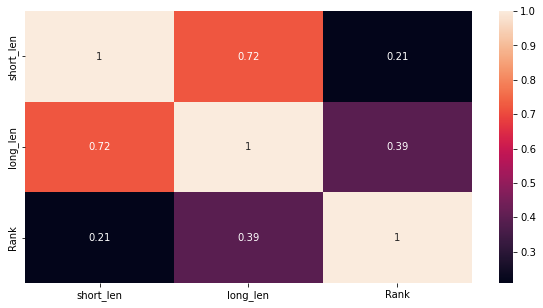

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df1,annot=True)

**Does APP ID (Also known as package name) play any role in ranking?**

In [42]:
df.rename(columns = {'App ID':'App_ID'}, inplace = True)

In [43]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App_ID,Date of Last Description Change,Short Description,Long Description,short_len,long_len
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1451
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2895
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3289
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,4336
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1569


In [57]:
map = {"com.android.chrome":1,'com.brave.browser': 2,'com.cloudmosa.puffinTV': 3,'com.duckduckgo.mobile.android': 4,'com.opera.browser': 5,'com.transsion.phoenix': 6,'com.vivaldi.browser': 7,'net.fast.web.browser': 8}
df.App_ID = df['App_ID'].map(map)

**To get the correlation of Ranking and App_ID, mapped the App_ID with numbers.**

In [45]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App_ID,Date of Last Description Change,Short Description,Long Description,short_len,long_len
0,1,browser,2.0,in,en,2020-12-16,8,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1451
1,2,browser,3.0,in,en,2020-12-16,1,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2895
2,3,browser,4.0,in,en,2020-12-16,5,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3289
3,3,browser,4.0,in,en,2020-12-16,5,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,4336
4,4,browser,1.0,in,en,2020-12-16,3,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1569


In [47]:
df2=df[['Rank','App_ID']]

In [48]:
corr_df2=df2.corr()

In [49]:
corr_df2

,Rank,App_ID
Rank,1.000000,0.528693
App_ID,0.528693,1.000000


<AxesSubplot:xlabel='App_ID', ylabel='Rank'>

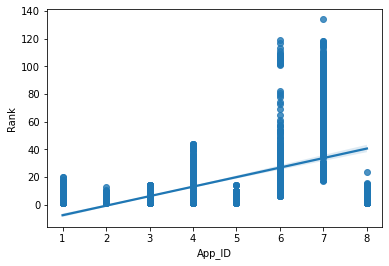

In [58]:
sns.regplot(x = "App_ID",y = "Rank",data = df2)

**There is strong positive correlation between App_ID and Ranking**

For App_ID related to number 1,2,3,5 and 8 having good ranking.

Below is the list of App_ID relared with the numbers:

1)com.android.chrome

2)com.brave.browser

3)com.cloudmosa.puffinTV

5)com.opera.browser

8)net.fast.web.browser